# #QuickGrab 
#### For cases where I open the file for the ONLY purpose of copying important code.

*This markdown cell and the following code cell were created after finishing this whole script


In [1]:
from pj_funcs import *

data = pd.read_csv('../data/raw/export.csv', encoding = 'Cp1252')
df = NSSP_Element_Grabber(data)

113.34256982803345


In [2]:
df_err = issues_in_messages(df, combine_issues_on_message=False, split_issue_column=False, Timed=True)

C:\Users\PGibson\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


Time Elapsed:   7.943 seconds


C:\Users\PGibson\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


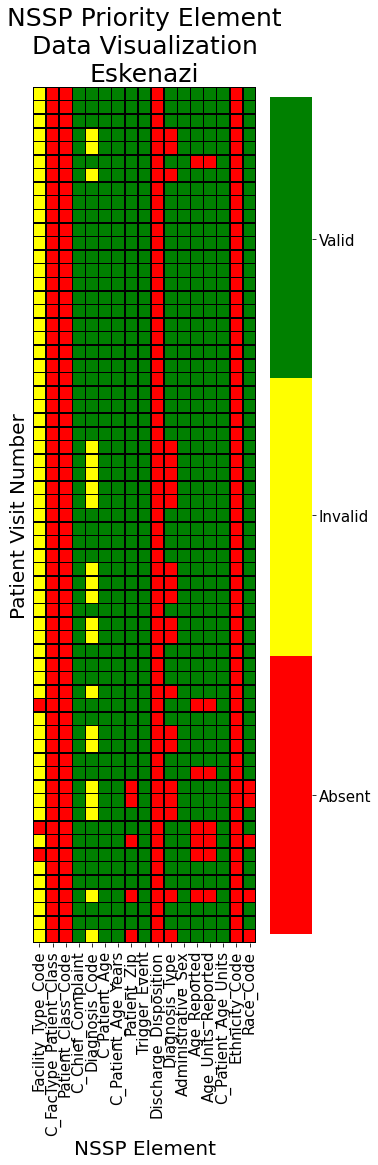

Time Elapsed:   7.725 seconds


In [4]:
visuals = Visualize_Facility_DQ(df,'Eskenazi',hide_yticks=True)

# Issues By HL7 Message

### Purpose:

To create a few functions to help better understand the issues associated with HL7 Messages.

### Implimentation:

There are 2 primary functions that I created to understand these issues.

* issues_in_messages(df, combine_issues_on_message=False, split_issue_column=False, Timed=True)

* Visualize_Facility_DQ(df,'Hospital Name', hide_yticks=True)


Full function definitions can be found at the bottom of the document and in the file 'pj_funcs.py' in this same directory.  For good funciton documentation of these functions, copy `issues_in_messages?` or `Visualize_Facility_DQ?` in a code cell (after importing * from pj_funcs) and then run the cell `SHIFT`+`ENTER`

### Examples / Visuals


# issues_in_messages() mock output dataframe

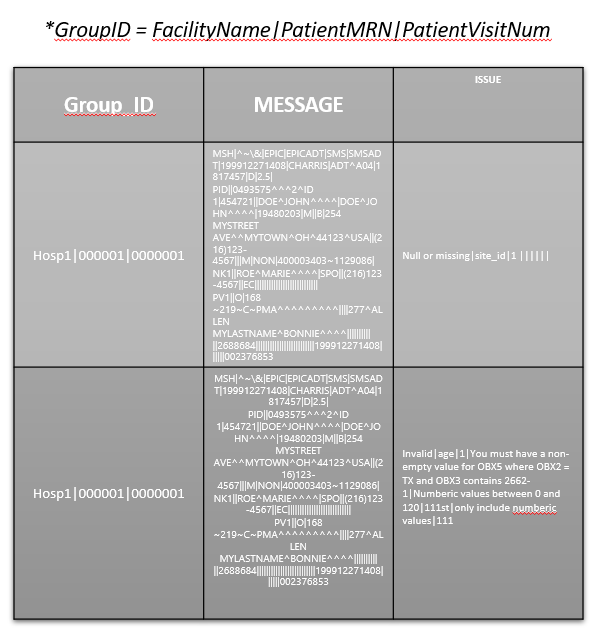



# Visualize_Facility_DQ() mock output dataframe


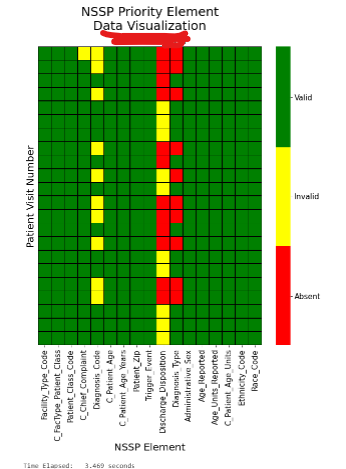

## Playing around with our functions!

In [ ]:
from pj_funcs import *

# Import our data and run it throught he NSSP_Element_Grabber function!

data = pd.read_csv('../data/raw/export.csv', encoding = 'Cp1252')
df = NSSP_Element_Grabber(data)

In [6]:
# Run our issues_in_messages function using different optional args

df_err = issues_in_messages(df, combine_issues_on_message=False, split_issue_column=False, Timed=True)
comb_issues = issues_in_messages(df, combine_issues_on_message=True, Timed=True)
split_issues = issues_in_messages(df, split_issue_column=True, Timed=True)

Time Elapsed:   9.214 seconds


C:\Users\PGibson\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


Time Elapsed:   15.477 seconds


C:\Users\PGibson\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


Time Elapsed:   10.884 seconds


In [ ]:
# If you want to change display output settings for dataframes

pd.get_option("display.max_rows")
pd.set_option("display.max_rows", 101)

#### Playing with the combined_issues by message dataset

In [14]:
# Checking out combinied issues.  Here's one cell printed out.
print(comb_issues.loc[0,'Issue'])

Missing or Null|Site_ID|1| ||||
Missing or Null|C_Facility_ID|1| ||||
Missing or Null|Chief_Complaint_Code|2|You must have non-empty OBX-5.1 and OBX-5.4 segments where OBX-3 contains  8661-1 or 11292-0 and OBX-2 = 'CWE' or 'CW'||||


Text(0.5, 1.0, 'Invalid Counts\n1236 messages')

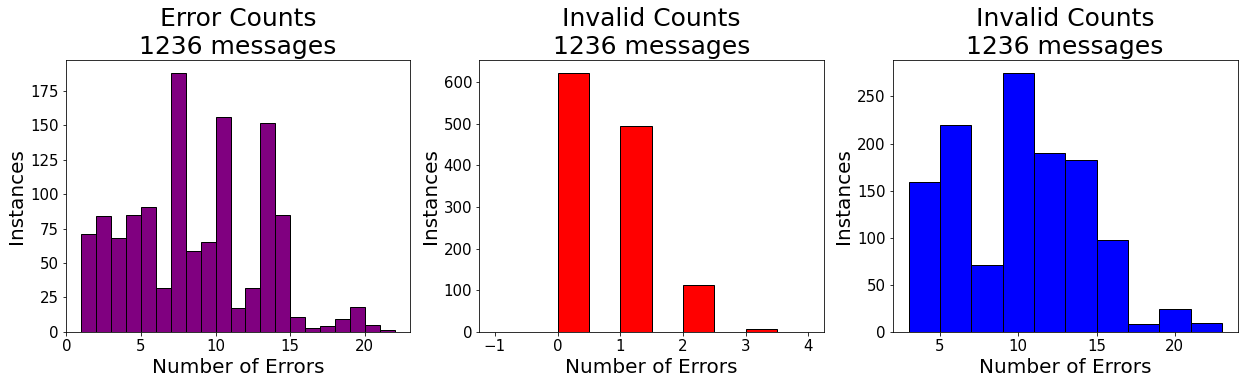

In [53]:
comb_issues = comb_issues.sort_values(by=['Num_Issues_Total'])

# Checking out how many errors we have
fig = plt.figure(figsize=(21,5))

ax1 = plt.subplot(1,3,1)
ax1.hist(comb_issues.Num_Issues_Total-2,color='purple',bins=21,edgecolor='black')
ax1.set_xlabel('Number of Errors')
ax1.set_ylabel('Instances')
ax1.set_title('Error Counts\n'+str(len(comb_issues))+' messages')

ax2 = plt.subplot(1,3,2)
ax2.hist(comb_issues.Num_Invalids,color='r',range=(-1,4),edgecolor='black')
ax2.set_xlabel('Number of Errors')
ax2.set_ylabel('Instances')
ax2.set_title('Invalid Counts\n'+str(len(comb_issues))+' messages')


ax3 = plt.subplot(1,3,3)
ax3.hist(comb_issues.Num_Missings,color='b',edgecolor='black')
ax3.set_xlabel('Number of Errors')
ax3.set_ylabel('Instances')
ax3.set_title('Invalid Counts\n'+str(len(comb_issues))+' messages')

#### Playing with the split issues dataframe

In [8]:
sub = split_issues.loc[split_issues.Issue_Type == 'Invalid']

# give output without MESSAGE/GrouperID (confidentiality)
sub[sub.Element_Name == 'Ethnicity_Code'].iloc[:,2:].head()

,Issue_Type,Element_Name,Priority,Description,Valid_Options,Message_Value,Suggestion,Comment
1912,Invalid,Ethnicity_Code,2,You must have a non-empty value for PID-22.1 o...,This value must be within the following set [ ...,N,2186-5,Number code is required. If non-Hispanic or L...
1940,Invalid,Ethnicity_Code,2,You must have a non-empty value for PID-22.1 o...,This value must be within the following set [ ...,UNK,,Unfortunatly Unknown is not a valid value. Mu...
2029,Invalid,Ethnicity_Code,2,You must have a non-empty value for PID-22.1 o...,This value must be within the following set [ ...,UNK,,Unfortunatly Unknown is not a valid value. Mu...
2169,Invalid,Ethnicity_Code,2,You must have a non-empty value for PID-22.1 o...,This value must be within the following set [ ...,N,2186-5,Number code is required. If non-Hispanic or L...
2244,Invalid,Ethnicity_Code,2,You must have a non-empty value for PID-22.1 o...,This value must be within the following set [ ...,H,2135-2,Number code is required. If Hispanic or Latin...


In [9]:
print('Invalid entries with non-null suggestion provided')
print(str((split_issues.Suggestion != '').sum())+'/'+str((split_issues.Issue_Type == 'Invalid').sum()))

print('\nThat\'s '+str(int((split_issues.Suggestion != '').sum() / (split_issues.Issue_Type == 'Invalid').sum()*100))+'%')

Invalid entries with non-null suggestion provided
748/779

That's 96%


In [12]:
# List of invalid element values with no provided suggestion (the odd-balls)

split_issues[['Element_Name','Message_Value']][(split_issues.Comment == '')&(split_issues.Issue_Type == 'Invalid')]

,Element_Name,Message_Value
581,Facility_Type_Code,Walk In
896,Facility_Type_Code,Walk In
1811,Facility_Type_Code,Walk In
4574,Facility_Type_Code,H.ERHOLD
4931,Facility_Type_Code,H.ERHOLD
6396,Discharge_Disposition,Lef
7122,Discharge_Disposition,Left Against
8050,Discharge_Disposition,CLE
9778,Discharge_Disposition,H
10075,Facility_Type_Code,H.ERHOLD


#### Visualization Function Examples

Input dataframe (output of NSSP_Grabber function), facility_name (as string)

C:\Users\PGibson\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


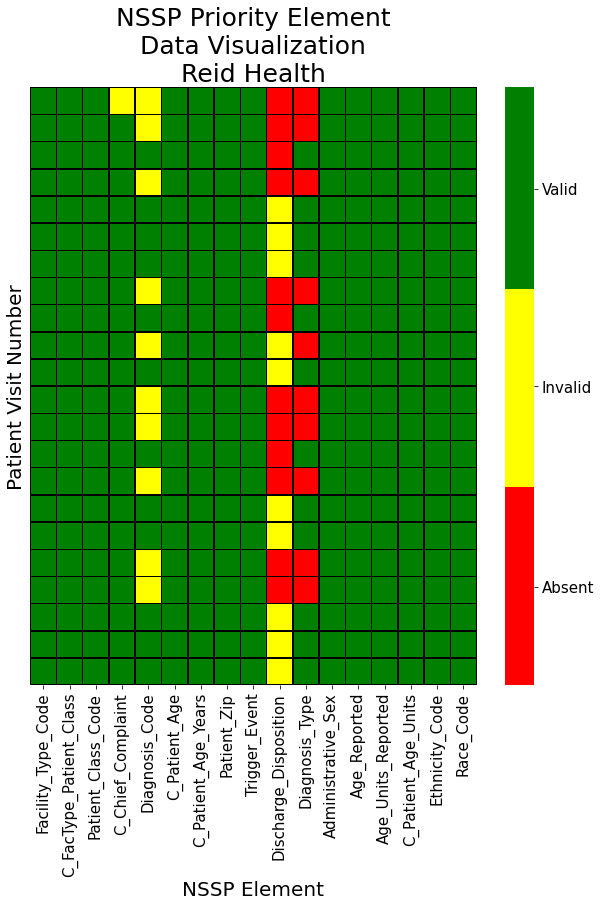

Time Elapsed:   3.469 seconds


In [14]:
bbb = Visualize_Facility_DQ(df,'Reid Health', hide_yticks=True)

In [22]:
bbb[0].iloc[:,:-1].head()

Element,Facility_Type_Code,C_FacType_Patient_Class,Patient_Class_Code,C_Chief_Complaint,Diagnosis_Code,C_Patient_Age,C_Patient_Age_Years,Patient_Zip,Trigger_Event,Discharge_Disposition,Diagnosis_Type,Administrative_Sex,Age_Reported,Age_Units_Reported,C_Patient_Age_Units,Ethnicity_Code,Race_Code
0,2,2,2,1,1,2,2,2,2,0,0,2,2,2,2,2,2
1,2,2,2,2,1,2,2,2,2,0,0,2,2,2,2,2,2
2,2,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2,2
3,2,2,2,2,1,2,2,2,2,0,0,2,2,2,2,2,2
4,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2


In [ ]:
# Contains confidential information so not included here.
bbb[1].head()

# Functions I made :)

In [8]:
def validity_check(df, Timed=True):
    
    '''
    Checks to see which elements in a dataframe's specific NSSP priority columns meet NSSP validity standards.
    Returns a True/False dataframe with FACILITY_NAME,PATIENT_MRN,PATIENT_VISIT_NUMBER as only string-type columns
    
    Parameters
    ----------
    
    df - required, pandas Dataframe, output from NSSP_Element_Grabber() function    
    Timed - optional, boolean (True/False), default is True.  Returns time in seconds of completion.
    
    Returns
    --------
    validity_report - True/False dataframe with FACILITY_NAME,PATIENT_MRN,PATIENT_VISIT_NUMBER as only string-type columns
    
    Requirements
    -------------
    import numpy as np
    import pandas as pd
    import time
    
    '''
    
    # Initialize Time
    start_time = time.time()
    
    
    # Read in the validity key
    key = pd.read_excel('../data/processed/NSSP_Validity_Reader2.xlsx')
    
    # Initialize empty pandas dataframe
    validity_report = pd.DataFrame()
    
    # Make sure we know nan means NaN
    nan = np.nan

    # Loop through each row in our validity key file
    for i in np.arange(0,len(key)):
        
        # Locate the row that our loop is on.  Define:
        row = key.iloc[i]
        
        # The element name 
        col_name = row['Element']
        
        #######################################################################################################
        #  All NSSP Priority Elements have validity checks that fall into one of the following 4 categories.
        #######################################################################################################

        # The list that the value may need to be part of to be valid.
        row_list = row['List']
        
        # The list that the value should not be part of to be valid.
        row_notlist = row['NOT_List']
        
        # The upper bound of a numeric value that it needs in order to be valid.
        row_bounds = row['Bounds']
        
        # The string fomat (in RegEx format) that a value needs to be valid.
        row_format = row['Format']

        #######################################################################################################
        # Check to see if this element has a non-null entry for one of the 4 broad criteria.
        #     If it does (which will only work for one of the four):
        #           Execute the code on the Element's who data column.
        #           Append a newly formed True/False array as a column to our output validity report
        #######################################################################################################
        
        if (row_list == row_list):
            listy = row_list.split(',')
            validity_report[col_name] = (df[col_name].str.upper().isin(listy))

        elif (row_notlist == row_notlist):
            nonlist = row_notlist.split(',')
            validity_report[col_name] = (~df[col_name].str.upper().isin(nonlist))  

        elif (row_bounds == row_bounds):
            num = 120
            validity_report[col_name] = pd.to_numeric(df[col_name]) < num

        elif (row_format == row_format):
            search = row_format
            validity_report[col_name] = (df[col_name].str.contains(search,na=False))
            
            
    # Keep track of end time
    end_time = time.time()
    
    # If user requests to see elapsed time, show them it in seconds
    if Timed == True:
        print('Time Elapsed:   '+str(round((end_time-start_time),3))+' seconds')
            
    return validity_report

In [6]:
def Visualize_Facility_DQ(df, fac_name, Timed = True):
    '''
    Returns Visualization of data quality in the form of a heatmap.
    Rows are all individual visits for the inputted facility.
    Columns are NSSP Priority elements that can be checked for validity.
    Color shows valid entries (green), invalid entries (yellow), and absent entries (red)
    
    Parameters
    ----------
    
    df - required, pandas Dataframe, output from NSSP_Element_Grabber() function
    fac_name - required, str, valid name of facility.
        if unsure of valid entry options, use the following code for options:
        df['FACILITY_NAME'].unique()   # may need to change for your df name
    
    Returns
    --------
    out[0] = Pandas dataframe used to create visualization.  2D composed of 0s (red), 1s (yellow), 2s (green)
    out[1] = Pandas dataframe of data behind visit.  Multiple HL7 messages composing 1 visit concatenated by '~' character
    
    Output
    -------
    sns.heatmap visualization
    
    Requirements
    -------------
    import numpy as np
    import seaborn as sns
    import matplotlib.pylab as plt
    import matplotlib.pyplot as plt
    import matplotlib
    import pandas as pd
    
    '''

    # Initialize Time
    start_time = time.time()
    
    # Create sub-dataframe of only visits within a facility
    hosp_visits = df[df.FACILITY_NAME==fac_name]

    # Read in our validity key
    key = pd.read_excel('../data/processed/NSSP_Validity_Reader.xlsx')

    # Initialize data quality array (0s 1s 2s)
    out0 = pd.DataFrame(columns=key.Element)
    
    # Initialize data represented array (hl7 data concatenated by ~ character)
    out1 = pd.DataFrame(columns=key.Element)

    # Set original index to 0.  Will increase by 1 after every visit has its info captured.
    cur_index = 0

    # Group by MRN
    MRN_group = hosp_visits.groupby('PATIENT_MRN')

    # Loop through our MRN Groups
    for index,frame in MRN_group:

        # Group by Visit Number
        VISIT_group = frame.groupby('PATIENT_VISIT_NUMBER')

        # Loop through VISITS
        for index2,frame2 in VISIT_group:

            # Initialize dataframe
            one_visit = pd.DataFrame()

            # Only look at visit info that can be checked for validity (must be a validity key element)
            impz = frame2.loc[:,key.Element]

            # Create correct format input for validity check.
            #    needs FACILITY_NAME,PATIENT_VISIT_NUMBER,PATIENT_MRN
            impz2 = impz.copy()
            impz2['FACILITY_NAME'] = fac_name
            impz2['PATIENT_MRN'] = index
            impz2['PATIENT_VISIT_NUMBER'] = index2
            
            

            # Run a validity check on our visit's important columns
            # Return all columns except for the last 3, the string columns FACNAME,PATIENTMRN,PATIENTVISIT#
            one_visit = validity_check(impz2,Timed=False).iloc[:,3:]

            # Completness returns 1D list of 0s / 1s determining if there is a non-null value in each column
            completeness = ((~impz.isnull()).sum() != 0).astype(int)

            # Validness returns 1D list of 0s / 1s determining if there is a valid value in each column
            validness = (one_visit.sum() != 0).astype(int)

            # Sum completness + validness to get picture for overall data quality
            tots = completeness+validness

            # Save this overall data quality score into our out0 array and save the index (Patient Visit Number)
            out0.loc[cur_index,:] = tots
            out0.loc[cur_index,'PATIENT_VISIT_NUMBER'] = index2

            # Also save our data that has been assessed for quality.  Concatenate by '~' character
            # First replace all NaN with empty character.  Need this to concat strings together.
            impz_no_na = impz.fillna('')
            
            for col in impz_no_na.columns:
                newcol = '~'.join(impz_no_na[col].astype(str))
                out1.loc[cur_index,col] = newcol

        
            # Visit over, onto the next.  Increase current index by +1
            cur_index += 1

    # Reset our arbitrary 0-n index and replace with the patient visit number
    out0.reset_index()
    out0.set_index('PATIENT_VISIT_NUMBER')

    print(out0)

    # Look at how many visits we have
    num_visits = len(out0)

    # Create scalar (just made sense in my head) for figure scaling.
    scalar = int(num_visits/20)+1
    
    # Create figure/axes with my respective scaling
    fig, ax = plt.subplots(figsize=(20/scalar,1*num_visits/scalar))

    # Create custom colormap
    my_cmap = colors.ListedColormap(['Red','Yellow','Green'])

    # Make a heatmap of our 0,1,2 array of absent, invalid, valid elements.
    #     specify linewidth, xticks, yticks, linecolor separation to black
    heatmap = sns.heatmap(np.array(out0)[:,:-1].astype(int),cmap=my_cmap,linewidth=0.5,
                          xticklabels=key.Element, linecolor='k',
                         yticklabels=out0.PATIENT_VISIT_NUMBER)

    ###################################################
    # Plot customization
    ###################################################

    # Increase size of xticks and x/y axes
    matplotlib.rc('xtick', labelsize=15) 
    matplotlib.rc('ytick', labelsize=15) 
    #matplotlib.rc('axes', labelsize=25) 
    plt.rc('axes', titlesize=25)     
    plt.rc('axes', labelsize=20)
    #matplotlib.rc('title', labelsize=30) 

    # Set colorbar axis
    cbar = ax.collections[0].colorbar
    cbar.set_ticks([0.33, 1, 1.66])
    cbar.set_ticklabels(['Absent', 'Invalid', 'Valid'])

    # Set Title
    plt.title('NSSP Priority Element\nData Visualization\n'+fac_name)    
    
    # Set and rotate xticks 90 deg
    plt.xticks(rotation=90) 
    plt.xlabel('NSSP Element')

    # Set ylabel
    plt.ylabel('Patient Visit Number')

    # Show your result
    plt.show()
    
    # Keep track of end time
    end_time = time.time()
    
    # If user requests to see elapsed time, show them it in seconds
    if Timed == True:
        print('Time Elapsed:   '+str(round((end_time-start_time),3))+' seconds')
    
    return out0,out1

In [ ]:

def issues_in_messages(df, Timed=True, combine_issues_on_message = False, split_issue_column = False):
    '''
    Processes dataframe outputted by NSSP_Element_Grabber() function.
    Outputs dataframe describing message errors.  See optional args for output dataframe customation.
    
    Parameters
    ----------
    
    df - required, pandas Dataframe, output from NSSP_Element_Grabber() function
    *Timed - optional, bool, default is True.  Outputs runtime in seconds upon completion.
    *combine_issues_on_message - optional, bool, default is False.  SEE (2) below
    *split_issue_column - optional, bool, default is False.  SEE (3) below
    
    
    NOTE:  only one of 'combine_issues_on_message' or 'split_issue_column' can be True
    
    Returns
    ----------------------------------------------------------------------------
    Pandas dataframe. Columns include:
    
    (1)
    DEFAULT: WHEN split_issue_colum = False , combine_issue_on_message = False
    
    Group_ID -> string concatenation of FACILITY_NAME|PATIENT_MRN|PATIENT_VISIT_NUMBER
    MESSAGE -> full original message
    Issue -> string concatenation of 'error_type|element_name|priority|description|valid_options|message_value|suggestion|comment'
    
    ------
    
    (2)
    WHEN combine_issue_on_message = True, split_issue_colum = False 
    
    Group_ID -> string concatenation of FACILITY_NAME|PATIENT_MRN|PATIENT_VISIT_NUMBER
    MESSAGE -> full original message
    Issue -> string concatenation of 'error_type|element_name|priority|description|valid_options|message_value|suggestion|comment'
             MULTIPLE string concatenations per cell, separated by newline '\n'
    
    Num_Missings -> number of issues that had a type of 'Missing or Null'
    Num_Invalids -> number of issues that had a type of 'Invalid'
    Num_Issues_Total -> number of total issues
    
    ------
    
    (3)
    WHEN combine_issue_on_message = False , split_issue_colum = True
    
    Group_ID -> string concatenation of FACILITY_NAME|PATIENT_MRN|PATIENT_VISIT_NUMBER
    MESSAGE -> full original message
    error_type -> 'Missing or Null' or 'Invalid'
    element_name -> NSSP Priority Element name with issue
    priority -> NSSP Priority '1' or '2'
    description -> Describes location/parameters of element in HL7 message
    valid_options -> IF element can be checked for validity, describes a valid entry.
    message_value -> IF element was determined as invalid, give the invalid element value.
    suggestion -> IF element was determined as invalid, give an educated guess as to what they meant.
    comment -> IF element was determined as invalid, give feedback/advice on the message error.
    
    
    --------------------------------------------------------------------------------
    
    Requirements
    -------------
    from pj_funcs import *
    import numpy as np
    import pandas as pd
    import time
    
    '''

    if (combine_issues_on_message=True)&(split_issue_column==True):
        print('ERROR:  Only 1 of: combine_issues_on_message / split_issue_column can be True ')
        return -1
    
    # Initialize Time
    start_time = time.time()
    ########################################################################################################
    # Create dataframe of 0s, 0.5s, 1s representing missing/null , invalid, and valid values.
    ########################################################################################################


    # we only want to look at priority columns
    new = priority_cols(df)

    #  Create a new column combining all information to group by visit
    new['Grouper_ID'] = df.FACILITY_NAME+'|'+df.PATIENT_MRN+'|'+df.PATIENT_VISIT_NUMBER

    ############

    # Run a validity check on the priority columns
    vc = validity_check(new,Timed=False)

    # Validity check only outputs priority columns so redefine our grouper ID.  We will set this to be our index
    vc['Grouper_ID'] = new['Grouper_ID']
    vc = vc.set_index('Grouper_ID')

    # Create a copy of our dataframes priority cols (new) and call it df1.  Set its index
    df1 = new.copy()
    df1 = df1.set_index('Grouper_ID')

    ############

    # Ones that have a non-empty value we will asign a value of 1 to.  Null-values will be assigned 0
    df_comp = (~df1.isnull()).astype(int) 

    # Validity check will also be interpreted as an integer.  
    df_vc = vc.astype(int)

    ############

    # Invalid entries will now be represented as -0.5 in our validity df
    df_vc = df_vc.replace(0,-0.5)

    # Valid entries will be represented as 0 in our validity df
    df_vc = df_vc.replace(1,0)

    ############

    # Find columns that can be checked for validity
    c = df_comp.columns.intersection(df_vc.columns)

    # For these columns, we want to sum our two dataframes [df_vc + df_comp]
    df_comp[c] =  df_comp[c].add(df_vc[c], fill_value=0)

    # NOTE at this point df_comp is an array of -0.5s, 0s, 1s, 2s. If a value that could be invalid was empty, the sum was 0+(-0.5)

    # Replace -0.5 with 0.  Represents an empty visit regarless of if it's also invalid
    df_comp = df_comp.replace(-0.5,0)

    # Reset the index and make a new, copied MESSAGE column
    df_comp = df_comp.reset_index()
    df_comp['MESSAGE'] = df['MESSAGE']

    ######################################################################

    # set the index of new again
    new  = new.set_index('Grouper_ID')

    # Replace any instance of | to ~ because we will later use pipe characters for an important purpose
    new = new.replace('\|','~', regex=True)
    new = new.reset_index()

    ########################################################################################################
    # Begin our part where we Create the dataframe 
    ########################################################################################################

    # Load our key and set its index
    key = pd.read_excel('../data/processed/Message_Corrector_Key.xlsx')
    key = key.set_index('Element')

    # Initialize df_out
    df_out = pd.DataFrame(columns=['MESSAGE','Grouper_ID','Issue'])
    cur_index = 0

    # To save time on efficiency, we write our rows directly instead of appending them (which rewrites array)
    #     to write rows directly, you need a rough estimate of how many rows you have.  We just did it exactly
    pointless = np.array([''] * (((df_comp == 0)|(df_comp == 0.5)).sum().sum()))
    df_out['DELETE_L8R'] = pointless


    # Loop through all rows in our dataframe of 0s,0.5s,1s (called df_comp)
    for i in np.arange(0,len(df_comp)):

        # Each row will have a grouper and Message we will eventually store in our output dataframe
        grouperID = df_comp['Grouper_ID'].iloc[i]
        message = df_comp['MESSAGE'].iloc[i]

        # Loop through all of the columns in our row
        for col in df_comp.columns:

            # Initialize empty list.  We will fill with strings and concatenate to fill our 'Issue' column if missing/invalid
            entry = []

            # See if the current cell value is 0 -> representing null/missing value
            if df_comp.loc[i,col] == 0:

                # Append the problem, the element name (col), the element priority, the element description
                entry.append('Missing or Null')
                entry.append(str(col))
                entry.append(str(key.loc[col,'Priority']))
                entry.append(str(key.loc[col,'Description']))

                # If there is a list of valid options in our key, append that, otherwise append empty string
                if (key.loc[col,'Valid_Options']) == (key.loc[col,'Valid_Options']):
                    entry.append(str(key.loc[col,'Valid_Options']))
                else:
                    entry.append('')

                # Append empty strings for Message entry, Comment, and Suggestion
                entry.append('')
                entry.append('')
                entry.append('')

            ########################################################################################################

            # See if the current cell value is 0.5 -> representing an invalid value
            elif df_comp.loc[i,col] == 0.5:

                # Append the problem, the element name (col), the element priority, the element description
                entry.append('Invalid')
                entry.append(str(col))
                entry.append(str(key.loc[col,'Priority']))
                entry.append(str(key.loc[col,'Description']))

                # Our df_comp cell was 0.5, therefore there is a list of valid options in our key, append that
                entry.append(str(key.loc[col,'Valid_Options']))

                # Append the value that was determined to be invalid.  DataFrame called new contains all initial cell values.
                entry.append(str(new.loc[i,col]))

                # Initialize our comment and suggestion.  If comment/suggestion exists, our executed code will replace these
                comment = ''
                suggestion = ''

                # See if we have a non-null code value.  
                if (key.loc[col,'Suggestion_Code']) == (key.loc[col,'Suggestion_Code']):

                    # Nearly all of these will call on our invalid value.  Define that
                    invalid_value = str(new.loc[i,col])

                    # Execute the code within the cell. Exec will append comment/suggestion to entry
                    code_to_run = str(key.loc[col,'Suggestion_Code'])
                    exec(code_to_run,globals(),locals())
                
                # If we don't have any code to exec(ute), append empty comment/suggestion to issue string
                else:
                    entry.append(comment)
                    entry.append(suggestionestion)




            ########################################################################################################

            # If there was a problem (either missing/invalid) the list called entry will be non-empty
            if len(entry) > 0:

                # Join our entries by a pipe character
                issue_string = '|'.join(entry)

                # Append our 3 column row to our output dataframe at the current index
                df_out.loc[cur_index] = [message,grouperID,issue_string,'']

                # Update the current index
                cur_index += 1


    # Delete the axis we initially made just to set length
    df_out = df_out.drop('DELETE_L8R',axis=1)

    
    ##############################################
    # Optional Args TIME
    ##############################################
    
    if (combine_issues_on_message == True):
    
        # create empty dataframe.  Correct length (column-wise).
        comb_on_issue = pd.DataFrame(columns=['MESSAGE','Grouper_ID','Issue'])

        # create the correct lengthed (row-wise) dataframe by recognizing all unique messages.  
        comb_on_issue.MESSAGE = df_out.MESSAGE.unique()

        # initialize a count
        count = 0

        # Loop through groupby objects when we group by MESSAGE
        for index,frame in df_out.groupby('MESSAGE'):

            # Identify the message (which is the index) and the grouper_ID (same for all parts of frame. Arbitrarily choose first index)
            message = index
            grouperID = frame.Grouper_ID.iloc[0]

            # Drop all duplicate rows.  Some messages may appear more than once in our original dataset
            frame2 = frame.drop_duplicates()

            # Combine all unique Issue values by a newline seperator.
            comb_issue = frame2.Issue.str.cat(sep='\n')   

            # Append our new info to dataframe and update our count.  
            comb_on_issue.iloc[count] = [message,grouperID,comb_issue]  
            count+=1
            
        # Create some extra columns describing number of types of errors
        comb_on_issue['Num_Missings'] = comb_on_issue.Issue.str.count('Missing or Null')
        comb_on_issue['Num_Invalids'] = comb_on_issue.Issue.str.count('Invalid\|')
        comb_on_issue['Num_Issues_Total'] = comb_on_issue['Num_Missings'] + comb_on_issue['Num_Invalids']
        
        # Rename our df_out so that we can only return one thing
        df_out = comb_on_issue

    ######################################################################################################################
    
    if (split_issue_column == True):
        expanded_issue = df_out.Issue.str.split('\|',expand=True)
        expanded_issue.columns = ['Issue_Type','Element_Name','Priority','Description','Valid_Options',
                                  'Message_Value','Suggestion','Comment']
        
        # Rename our df_out so that we only return one thing
        df_out = df_out[['MESSAGE','Grouper_ID']].join(expanded_issue)
    
    ######################################################################################################################

    # Keep track of end time
    end_time = time.time()

    # If user requests to see elapsed time, show them it in seconds
    if Timed == True:
        print('Time Elapsed:   '+str(round((end_time-start_time),3))+' seconds')
        
    return df_out